In [320]:
import matplotlib.pyplot as plt
import numpy as np

In [365]:
class Solow():

    def __init__(self,
                 which = 'Null',
                 k = 0.01,              # capital
                 t = 1,                 # time
                 A = 1,                 # inital technology
                 n = 0.2,               # population growth rate
                 α = 0.02,              # technology growth
                 σ = 0.2,               # savings rate
                 θ = 0.36,              # share of capital
                 δ = 0.1,               # depreciation rate
                 ε = 0):                # shock
        
        self.which = which
        self.k = k
        self.A = A
        self.n = n
        self.t = t
        self.α = α
        self.σ = σ
        self.θ = θ
        self.δ = δ
        self.ε = ε
        
    def next_k(self):
        
        ''' returns k_{t+1} given k_t '''
        
        k, A, n, σ, θ, δ, α, t, ε = self.k, self.A, self.n, self.σ, self.θ, self.δ, self.α, self.t, self.ε
        
        if self.which == 'Null':
        
            return ((1-δ)*k + σ*A*k**θ)/(1+n)
        
        if self.which == 'Constant':
        
            return ((1-δ)*k + σ*(1+α)**t*A*k**θ)/(1+n)
        
        if self.which == 'Stochastic':
            
            e = np.exp(1)
            
            return ((1-δ)*k + σ*A*e**ε*k**θ)/(1+n)
        
        if self.which == 'Log':
            
            b = (1 + θ*n - δ*(1-θ))/(1+n)
            c = (δ + n)/(1 + n)
            
            return b*k + c*ε
            
    def equilibrium_k(self):
        
        ''' returns the steady state capital '''
        
        k, A, n, σ, θ, δ = self.k, self.A, self.n, self.σ, self.θ, self.δ
        
        return (σ*A/(δ+n))**(1/(1-θ))
    
    def k_growth(self):
        
        ''' returns capital growth given the level of capital '''
        
        k, next_k = self.k, self.next_k()
        
        return next_k/k-1
    
    def max_savings(self):
        
        ''' returns the optimum savings level '''
        
        δ, n, k_, A, θ = self.δ, self.n, self.equilibrium_k(), self.A, self.θ
        
        return ((δ + n)*k_)/(A*k_**θ)
    
    def update(self):
        
        self.t += 1
        self.k = self.next_k()
        self.ε = np.random.normal()
    
    def simulate(self):
        
        ''' simulates the model '''
        
        lista = []
        
        for i in range(120):
            lista.append(self.k)
            self.update()
        
        self.k = 0.01
            
        return plt.plot(lista)
    
    def figure_1(self):
        
        self.which = 'Null'
        self.k = np.linspace(0,0.6,100)
        
        plt.plot(a.k, a.k)
        plt.plot(a.k, a.next_k())
        plt.xlabel('$k_{t}$')
        plt.ylabel('$k_{t+1}$')
        plt.show()
        
    def figure_2(self):
        
        self.which = 'Stochastic'
        self.k = 2.3
        
        for i in range(3):
            a.simulate()
        
        plt.show()
        
    def figure_3(self):
        
        a = 2.3
        b = 2.3
        
        sto = [a]
        log = [b]
        
        for i in range(120):
            
            self.update()
            
            self.which = 'Stochastic'
            self.k = a
            a = self.next_k()
            sto.append(a)
            
            self.which = 'Log'
            self.k = b
            b = self.next_k()
            log.append(b)
        
        plt.plot(sto)
        plt.plot(log)
        plt.legend(['Stochastic', 'Log linear'])
        plt.show()

In [366]:
a = Solow()

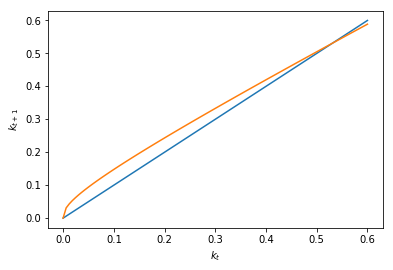

In [367]:
a.figure_1()

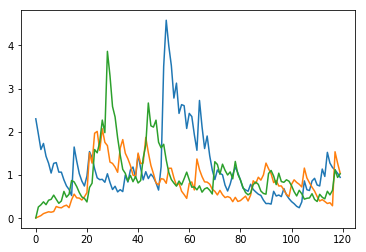

In [368]:
a.figure_2()

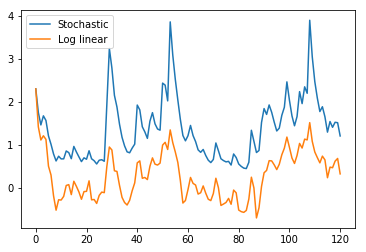

In [369]:
a.figure_3()

In [370]:
c = 'evidências sobre informação e estrutura a termo da taxa de juros no brasil'

In [372]:
c.upper()

'EVIDÊNCIAS SOBRE INFORMAÇÃO E ESTRUTURA A TERMO DA TAXA DE JUROS NO BRASIL'